## Imports

In [1]:
import os
import sys
import shutil
import logging
import glob

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex = True)

plt.rcParams.update(  # try to match font sizes of document
  {'axes.labelsize': 20,
   'axes.titlesize': 20,
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'text.usetex': True,
   'font.family': 'serif',
   'font.serif': ['palatino'],
   'savefig.dpi': 300
   })

%pylab inline

from glue.ligolw import ligolw
from glue.ligolw import table
from glue.ligolw import lsctables
from glue.ligolw import ilwd
from glue.ligolw import utils as ligolw_utils

import pycbc.strain
import pycbc.psd
from pycbc.pnutils import mass1_mass2_to_mchirp_eta
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.waveform import get_two_pol_waveform_filter, get_td_waveform
from pycbc import DYN_RANGE_FAC
from pycbc.types import FrequencySeries, zeros
from pycbc.filter import match, overlap, sigma, make_frequency_series
from pycbc.scheme import CPUScheme, CUDAScheme
from gwnr.Utils.SupportFunctions import make_padded_frequency_series
from pycbc import pnutils

Populating the interactive namespace from numpy and matplotlib


/home/prayush.kumar/local/venv/pycbc_master_enigma/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Could not import ligolw in /home/prayush.kumar/src/GWNRTools/GWNRTools/Stats/FisherMatrixUtilities.pyc, LIGO XML tables wont be read


In [3]:
run_dirs = [
    '/home/prayush.kumar/projects/template_banks/faithfulness_SEOBNRv4_vs_SEOBNRv4_ROM',
    '/home/prayush.kumar/projects/template_banks/faithfulness_SEOBNRv4_vs_SEOBNRv2_ROM',
    '/home/prayush.kumar/projects/template_banks/faithfulness_SEOBNRv4_vs_SEOBNRv2',
    '/home/prayush.kumar/projects/template_banks/faithfulness_SEOBNRv4_vs_EOBNRv2'
]
models = [
    'SEOBNRv4_ROM', 'SEOBNRv2_ROM_DoubleSpin', 'SEOBNRv2', 'EOBNRv2'
]
plot_dir = '/home/prayush.kumar/src/EccentricIMRTemplateBank/Paper/plots/faithfulness/'

In [4]:
for d in run_dirs:
    try: os.makedirs(d)
    except: logging.warn("Directory {} already exists.".format(d))

In [3]:
os.chdir()

In [8]:
for d in run_dirs:
    os.chdir(d)
    !ls

faithsim.ini
faithsim.ini
faithsim.ini
faithsim.ini


In [5]:
!rm -fr *

In [6]:
!rm -rf bank log match plots scripts *.sub faithsim.dag* faithsim.sh inj*xml dag.out result*.dat submit.sh

In [7]:
!ls

## Create workflow

In [6]:
ini_filename = "faithsim.ini"

In [7]:
for d, approx in zip(run_dirs, models):
    os.chdir(d)
    with open(ini_filename, "w") as fp:
        fp.write("""
[inspinj]
num-new-points = 5000
component-mass-min = 5.0
component-mass-max = 50.0
total-mass-max = 100.0
spin-component-min = 0
spin-component-max = 0
spin-mag-min = 0
spin-mag-max = 0
eccentricity-min = 0
eccentricity-max = 0
coa-phase-min = 0
coa-phase-max = 0
inclination-min = 0
inclination-max = 0
long-asc-nodes-min = 0
long-asc-nodes-max = 0
mean-per-ano-min = 0
mean-per-ano-max = 0
mchirp-window = 0
eccentricity-window = 0
output-prefix = inj
verbose =


[executables]
inspinj = /home/prayush.kumar/local/venv/pycbc_master_enigma/src/gwnrtools/bin/gwnr_sample_parameter_space
faithsim = /home/prayush.kumar/local/venv/pycbc_master_enigma/src/gwnrtools/bin/gwnr_faithsim

[workflow]
accounting-group = ligo.dev.o3.cbc.explore.test
templates-per-job = 100
log-path = /usr1/prayush.kumar/

[faithsim-flatIMRC]
psd-model = aLIGOZeroDetHighPower
waveform1-approximant = {0}
waveform1-start-frequency=24
waveform2-approximant = SEOBNRv4
waveform2-start-frequency=24
filter-low-frequency=25
filter-sample-rate=8192 
filter-waveform-length=64
""".format(approx))

In [9]:
for d in run_dirs:
    os.chdir(d)
    logging.warn("Configuring faithsim run in {0}".format(d))
    !/home/prayush.kumar/local/venv/pycbc_master_enigma/src/gwnrtools/bin/gwnr_create_faithsim_workflow \
        --config=faithsim.ini

2020-01-16 00:18:47,716 Making workspace directories
2020-01-16 00:18:47,770 Copying scripts
2020-01-16 00:18:47,784 Creating injection file
Could not import ligolw in /home/prayush.kumar/src/GWNRTools/GWNRTools/Stats/FisherMatrixUtilities.pyc, LIGO XML tables wont be read
2020-01-16 00:18:51,924 | INFO : mchirp-window = 0.000000
2020-01-16 00:18:51,925 | INFO : eccentricity-window = 0.000000
2020-01-16 00:18:51,925 | INFO : Storing the new sample points in inj.xml
2020-01-16 00:18:51,934 | INFO : 0 points chosen
2020-01-16 00:18:51,952 | INFO : 100 points chosen
2020-01-16 00:18:51,978 | INFO : 200 points chosen
2020-01-16 00:18:52,012 | INFO : 300 points chosen
2020-01-16 00:18:52,055 | INFO : 400 points chosen
2020-01-16 00:18:52,104 | INFO : 500 points chosen
2020-01-16 00:18:52,162 | INFO : 600 points chosen
2020-01-16 00:18:52,229 | INFO : 700 points chosen
2020-01-16 00:18:52,302 | INFO : 800 points chosen
2020-01-16 00:18:52,389 | INFO : 900 points chosen
2020-01-16 00:18:52,48

2020-01-16 00:19:09,411 Making workspace directories
2020-01-16 00:19:09,489 Copying scripts
2020-01-16 00:19:09,505 Creating injection file
Could not import ligolw in /home/prayush.kumar/src/GWNRTools/GWNRTools/Stats/FisherMatrixUtilities.pyc, LIGO XML tables wont be read
2020-01-16 00:19:14,003 | INFO : mchirp-window = 0.000000
2020-01-16 00:19:14,003 | INFO : eccentricity-window = 0.000000
2020-01-16 00:19:14,003 | INFO : Storing the new sample points in inj.xml
2020-01-16 00:19:14,016 | INFO : 0 points chosen
2020-01-16 00:19:14,039 | INFO : 100 points chosen
2020-01-16 00:19:14,071 | INFO : 200 points chosen
2020-01-16 00:19:14,113 | INFO : 300 points chosen
2020-01-16 00:19:14,167 | INFO : 400 points chosen
2020-01-16 00:19:14,232 | INFO : 500 points chosen
2020-01-16 00:19:14,308 | INFO : 600 points chosen
2020-01-16 00:19:14,396 | INFO : 700 points chosen
2020-01-16 00:19:14,495 | INFO : 800 points chosen
2020-01-16 00:19:14,611 | INFO : 900 points chosen
2020-01-16 00:19:14,70

2020-01-16 00:19:33,052 Making workspace directories
2020-01-16 00:19:33,135 Copying scripts
2020-01-16 00:19:33,153 Creating injection file
Could not import ligolw in /home/prayush.kumar/src/GWNRTools/GWNRTools/Stats/FisherMatrixUtilities.pyc, LIGO XML tables wont be read
2020-01-16 00:19:38,459 | INFO : mchirp-window = 0.000000
2020-01-16 00:19:38,460 | INFO : eccentricity-window = 0.000000
2020-01-16 00:19:38,460 | INFO : Storing the new sample points in inj.xml
2020-01-16 00:19:38,472 | INFO : 0 points chosen
2020-01-16 00:19:38,494 | INFO : 100 points chosen
2020-01-16 00:19:38,525 | INFO : 200 points chosen
2020-01-16 00:19:38,567 | INFO : 300 points chosen
2020-01-16 00:19:38,620 | INFO : 400 points chosen
2020-01-16 00:19:38,684 | INFO : 500 points chosen
2020-01-16 00:19:38,758 | INFO : 600 points chosen
2020-01-16 00:19:38,842 | INFO : 700 points chosen
2020-01-16 00:19:38,938 | INFO : 800 points chosen
2020-01-16 00:19:39,046 | INFO : 900 points chosen
2020-01-16 00:19:39,14

2020-01-16 00:19:55,742 Making workspace directories
2020-01-16 00:19:55,899 Copying scripts
2020-01-16 00:19:55,920 Creating injection file
Could not import ligolw in /home/prayush.kumar/src/GWNRTools/GWNRTools/Stats/FisherMatrixUtilities.pyc, LIGO XML tables wont be read
2020-01-16 00:20:00,306 | INFO : mchirp-window = 0.000000
2020-01-16 00:20:00,306 | INFO : eccentricity-window = 0.000000
2020-01-16 00:20:00,306 | INFO : Storing the new sample points in inj.xml
2020-01-16 00:20:00,319 | INFO : 0 points chosen
2020-01-16 00:20:00,337 | INFO : 100 points chosen
2020-01-16 00:20:00,360 | INFO : 200 points chosen
2020-01-16 00:20:00,394 | INFO : 300 points chosen
2020-01-16 00:20:00,436 | INFO : 400 points chosen
2020-01-16 00:20:00,488 | INFO : 500 points chosen
2020-01-16 00:20:00,550 | INFO : 600 points chosen
2020-01-16 00:20:00,619 | INFO : 700 points chosen
2020-01-16 00:20:00,698 | INFO : 800 points chosen
2020-01-16 00:20:00,789 | INFO : 900 points chosen
2020-01-16 00:20:00,88

### Verify test injections

In [10]:
def param_from_table(param, table):
    return np.array([
        getattr(p, param) for p in table
    ])

Total 5000 test-points in /home/prayush.kumar/projects/template_banks/faithfulness_SEOBNRv4_vs_SEOBNRv4_ROM
Total 5000 test-points in /home/prayush.kumar/projects/template_banks/faithfulness_SEOBNRv4_vs_SEOBNRv2_ROM
Total 5000 test-points in /home/prayush.kumar/projects/template_banks/faithfulness_SEOBNRv4_vs_SEOBNRv2
Total 5000 test-points in /home/prayush.kumar/projects/template_banks/faithfulness_SEOBNRv4_vs_EOBNRv2


/home/prayush.kumar/local/venv/pycbc_master_enigma/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


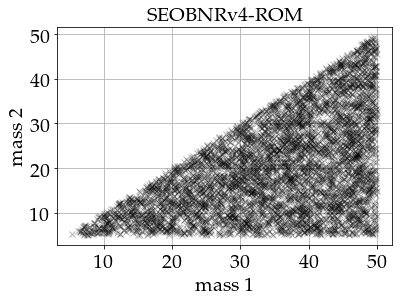

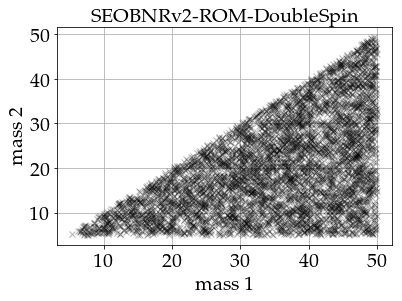

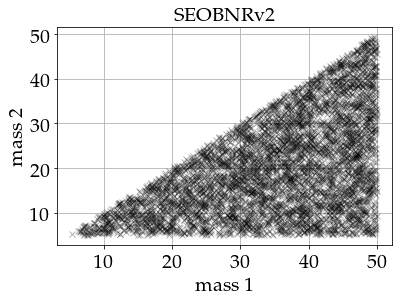

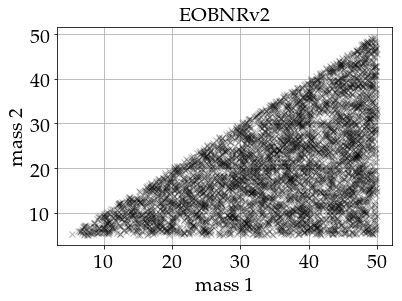

In [11]:
for d, approx in zip(run_dirs, models):
    inj_filename = 'inj.xml'
    indoc = ligolw_utils.load_filename(inj_filename, contenthandler=table.use_in(ligolw.LIGOLWContentHandler))
    inj_table = lsctables.SimInspiralTable.get_table(indoc)
    print("Total {0} test-points in {1}".format(len(inj_table), d))    
    m1 = np.array([inj.mass1 for inj in inj_table])
    m2 = np.array([inj.mass2 for inj in inj_table])
    plt.figure()
    plt.plot(m1, m2, 'kx', alpha=0.3)
    plt.grid()
    plt.title(approx.replace('_', '-'))
    plt.xlabel('mass 1')
    plt.ylabel('mass 2')

## Submit and monitor job

In [12]:
for d in run_dirs:
    !ls

bank		     faithsim-flatIMRC.sub  faithsim.sh  match	  submit.sh
collect_results.sub  faithsim.ini	    inj.xml	 plots
faithsim.dag	     faithsim_plots.sub     log		 scripts
bank		     faithsim-flatIMRC.sub  faithsim.sh  match	  submit.sh
collect_results.sub  faithsim.ini	    inj.xml	 plots
faithsim.dag	     faithsim_plots.sub     log		 scripts
bank		     faithsim-flatIMRC.sub  faithsim.sh  match	  submit.sh
collect_results.sub  faithsim.ini	    inj.xml	 plots
faithsim.dag	     faithsim_plots.sub     log		 scripts
bank		     faithsim-flatIMRC.sub  faithsim.sh  match	  submit.sh
collect_results.sub  faithsim.ini	    inj.xml	 plots
faithsim.dag	     faithsim_plots.sub     log		 scripts


In [13]:
for d in run_dirs:
    os.chdir(d)
    logging.warn("Submitting workflow in {0}".format(d))
    !condor_submit_dag faithsim.dag >> dag.out
    !cat dag.out

Submitting job(s).
1 job(s) submitted to cluster 36323143.

-----------------------------------------------------------------------
File for submitting this DAG to HTCondor           : faithsim.dag.condor.sub
Log of DAGMan debugging messages                 : faithsim.dag.dagman.out
Log of HTCondor library output                     : faithsim.dag.lib.out
Log of HTCondor library error messages             : faithsim.dag.lib.err
Log of the life of condor_dagman itself          : faithsim.dag.dagman.log

-----------------------------------------------------------------------


Submitting job(s).
1 job(s) submitted to cluster 36323144.

-----------------------------------------------------------------------
File for submitting this DAG to HTCondor           : faithsim.dag.condor.sub
Log of DAGMan debugging messages                 : faithsim.dag.dagman.out
Log of HTCondor library output                     : faithsim.dag.lib.out
Log of HTCondor library error messages             : faithsim.dag.lib.err
Log of the life of condor_dagman itself          : faithsim.dag.dagman.log

-----------------------------------------------------------------------


Submitting job(s).
1 job(s) submitted to cluster 36323145.

-----------------------------------------------------------------------
File for submitting this DAG to HTCondor           : faithsim.dag.condor.sub
Log of DAGMan debugging messages                 : faithsim.dag.dagman.out
Log of HTCondor library output                     : faithsim.dag.lib.out
Log of HTCondor library error messages             : faithsim.dag.lib.err
Log of the life of condor_dagman itself          : faithsim.dag.dagman.log

-----------------------------------------------------------------------


Submitting job(s).
1 job(s) submitted to cluster 36323146.

-----------------------------------------------------------------------
File for submitting this DAG to HTCondor           : faithsim.dag.condor.sub
Log of DAGMan debugging messages                 : faithsim.dag.dagman.out
Log of HTCondor library output                     : faithsim.dag.lib.out
Log of HTCondor library error messages             : faithsim.dag.lib.err
Log of the life of condor_dagman itself          : faithsim.dag.dagman.log

-----------------------------------------------------------------------


In [19]:
for d in run_dirs:
    os.chdir(d)
    logging.warn("Status of workflow in {0}".format(d))
    !tail faithsim.dag.dagman.out 

01/16/20 00:26:59 Of 52 nodes total:
01/16/20 00:26:59  Done     Pre   Queued    Post   Ready   Un-Ready   Failed
01/16/20 00:26:59   ===     ===      ===     ===     ===        ===      ===
01/16/20 00:26:59    52       0        0       0       0          0        0
01/16/20 00:26:59 0 job proc(s) currently held
01/16/20 00:26:59 DAGMan Runtime Statistics: [ EventCycleTimeStd = 0.4046387893696403; EventCycleTimeMax = 3.462733030319214; SubmitCycleTimeMin = 6.914138793945312E-06; SubmitCycleTimeAvg = 0.054021113797238; SleepCycleTimeCount = 75.0; SubmitCycleTimeCount = 76.0; SubmitCycleTimeMax = 3.462416887283325; SleepCycleTimeMin = 5.000338077545166; SubmitCycleTimeSum = 4.105604648590088; LogProcessCycleTimeStd = 0.0009245146816143386; SubmitCycleTimeStd = 0.4020367807036209; LogProcessCycleTimeAvg = 0.0009113920146021349; EventCycleTimeMin = 2.694129943847656E-05; LogProcessCycleTimeMax = 0.004381895065307617; LogProcessCycleTimeMin = 0.0003170967102050781; LogProcessCycleTimeSum =

01/16/20 00:27:24 Of 52 nodes total:
01/16/20 00:27:24  Done     Pre   Queued    Post   Ready   Un-Ready   Failed
01/16/20 00:27:24   ===     ===      ===     ===     ===        ===      ===
01/16/20 00:27:24    52       0        0       0       0          0        0
01/16/20 00:27:24 0 job proc(s) currently held
01/16/20 00:27:24 DAGMan Runtime Statistics: [ EventCycleTimeStd = 0.3893541957092513; EventCycleTimeMax = 3.474737167358398; SubmitCycleTimeMin = 5.960464477539062E-06; SubmitCycleTimeAvg = 0.04734776638172291; SleepCycleTimeCount = 80.0; SubmitCycleTimeCount = 81.0; SubmitCycleTimeMax = 3.474418878555298; SleepCycleTimeMin = 5.000287055969238; SubmitCycleTimeSum = 3.835169076919556; LogProcessCycleTimeStd = 0.001098954574665132; SubmitCycleTimeStd = 0.3869976191442634; LogProcessCycleTimeAvg = 0.0009956274713788713; EventCycleTimeMin = 2.217292785644531E-05; LogProcessCycleTimeMax = 0.004586935043334961; LogProcessCycleTimeMin = 0.000164031982421875; LogProcessCycleTimeSum =

01/16/20 00:31:08 Of 52 nodes total:
01/16/20 00:31:08  Done     Pre   Queued    Post   Ready   Un-Ready   Failed
01/16/20 00:31:08   ===     ===      ===     ===     ===        ===      ===
01/16/20 00:31:08    52       0        0       0       0          0        0
01/16/20 00:31:08 0 job proc(s) currently held
01/16/20 00:31:08 DAGMan Runtime Statistics: [ EventCycleTimeStd = 0.1901065301947186; EventCycleTimeMax = 2.115154981613159; SubmitCycleTimeMin = 6.914138793945312E-06; SubmitCycleTimeAvg = 0.01827599143981934; SleepCycleTimeCount = 124.0; SubmitCycleTimeCount = 125.0; SubmitCycleTimeMax = 2.114844083786011; SleepCycleTimeMin = 5.000372171401978; SubmitCycleTimeSum = 2.284498929977417; LogProcessCycleTimeStd = 0.0008430308720195354; SubmitCycleTimeStd = 0.1893584324656588; LogProcessCycleTimeAvg = 0.0008422931035359701; EventCycleTimeMin = 2.503395080566406E-05; LogProcessCycleTimeMax = 0.004715919494628906; LogProcessCycleTimeMin = 0.00018310546875; LogProcessCycleTimeSum = 

01/16/20 00:35:39 Of 52 nodes total:
01/16/20 00:35:39  Done     Pre   Queued    Post   Ready   Un-Ready   Failed
01/16/20 00:35:39   ===     ===      ===     ===     ===        ===      ===
01/16/20 00:35:39    52       0        0       0       0          0        0
01/16/20 00:35:39 0 job proc(s) currently held
01/16/20 00:35:39 DAGMan Runtime Statistics: [ EventCycleTimeStd = 0.1604728155901576; EventCycleTimeMax = 2.129075050354004; SubmitCycleTimeMin = 5.960464477539062E-06; SubmitCycleTimeAvg = 0.01362952706534103; SleepCycleTimeCount = 178.0; SubmitCycleTimeCount = 179.0; SubmitCycleTimeMax = 2.128826141357422; SleepCycleTimeMin = 5.000112056732178; SubmitCycleTimeSum = 2.439685344696045; LogProcessCycleTimeStd = 0.001282108502181632; SubmitCycleTimeStd = 0.1600357220632073; LogProcessCycleTimeAvg = 0.001129269599914551; EventCycleTimeMin = 2.598762512207031E-05; LogProcessCycleTimeMax = 0.006278038024902344; LogProcessCycleTimeMin = 0.00026702880859375; LogProcessCycleTimeSum =

## Explore results

In [20]:
bfields = ('match', 'overlap', 'time_offset', 'sigma1', 'sigma2', 'mass1',
           'mass2', 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y',
           'spin2z', 'inclination', 'latitude', 'longitude',
           'polarization', 'coa_phase')
dtypeo={'names': bfields,
        'formats': ('f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                    'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8')}

In [22]:
all_results = {}
all_masked_results = {}

for d, approx in zip(run_dirs, models):
    os.chdir(d)
    results_filename           = glob.glob('result-*.dat')[0] #'result-flatIMRC.dat'
    all_results[approx]        = np.loadtxt(results_filename, dtype = dtypeo)
    
    # clean up data results
    all_masked_results[approx] = all_results[approx][np.isfinite(all_results[approx]['match'])]
    all_masked_results[approx] = all_masked_results[approx][all_masked_results[approx]['match'] > 0.0]
    
    print(len(all_masked_results[approx]['match']))
    print(all_masked_results[approx]['match'])

4944
[0.99993 0.99983 0.99997 ... 0.9997  0.99998 0.99976]
4932
[0.99612 0.9961  0.99707 ... 0.99158 0.99548 0.99181]
4953
[0.9937  0.99053 0.98928 ... 0.99099 0.99058 0.98599]
4933
[0.99247 0.99397 0.99395 ... 0.99389 0.98909 0.99154]


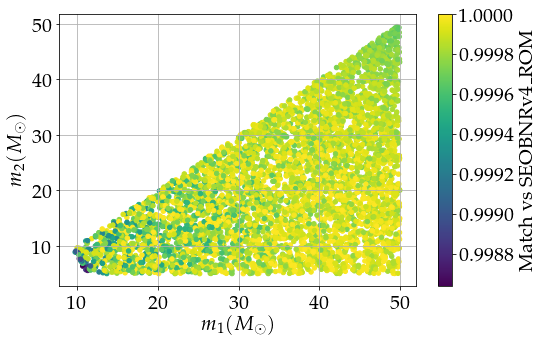

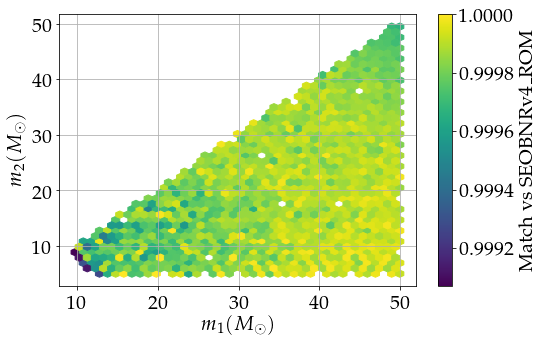

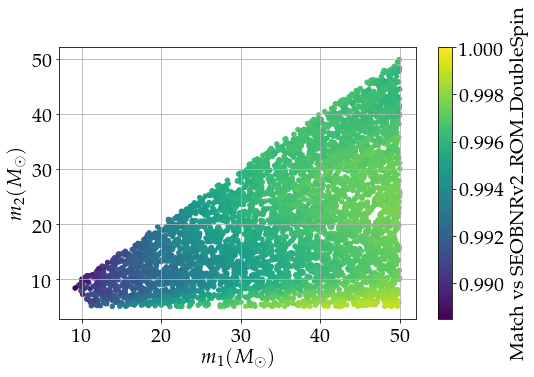

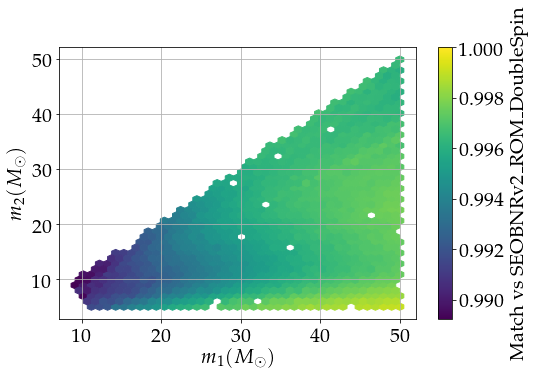

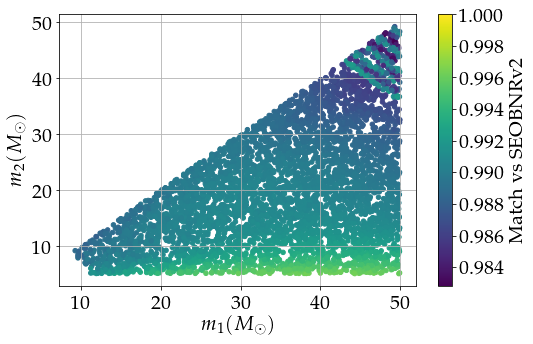

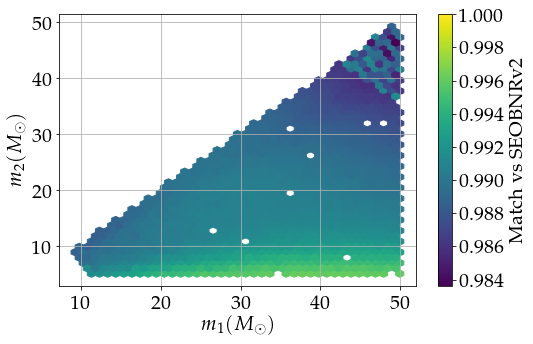

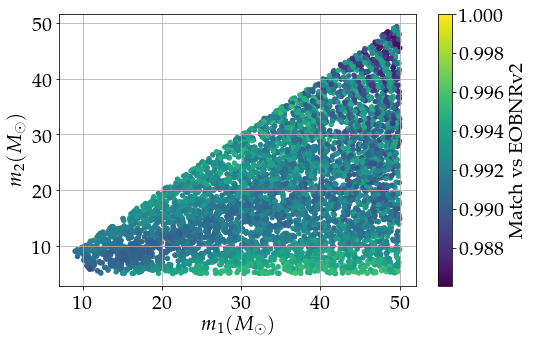

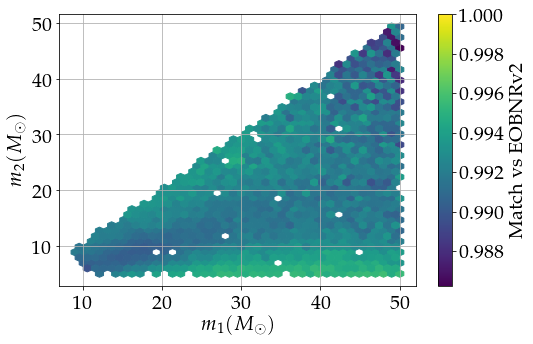

In [26]:
for d, a in zip(run_dirs, models):
    logging.warn("Showing figures for {0}".format(a))
    masked_results = all_masked_results[a]
    # figure style 1
    plt.figure(figsize = (8, 5))
    plt.scatter(masked_results['mass1'], masked_results['mass2'], c = masked_results['match'],
                 s = 20, vmax =  1.0)#, vmin = 0.96)
    plt.xlabel('$m_1 (M_\odot)$', fontsize = 20)
    plt.ylabel('$m_2 (M_\odot)$', fontsize = 20)
    plt.grid()
    cb = plt.colorbar()#(label='Overlap')
    cb.set_label('Match vs {}'.format(a.replace('_', '\_')))
    plt.savefig(os.path.join(plot_dir,
                             '{0}_SEOBNRv4_no_incl_no_ecc_match_over_mass1_mass2_scatter.pdf'.format(a)))
    
    # figure style 2
    plt.figure(figsize = (8, 5))
    plt.hexbin(masked_results['mass1'], masked_results['mass2'], C = masked_results['match'],
               gridsize = 40, vmax =  1.0)
    plt.xlabel('$m_1 (M_\odot)$', fontsize = 20)
    plt.ylabel('$m_2 (M_\odot)$', fontsize = 20)
    plt.grid()
    cb = plt.colorbar()#(label='Overlap')
    cb.set_label('Match vs {}'.format(a.replace('_', '\_')))
    plt.savefig(os.path.join(plot_dir,
                             '{0}_SEOBNRv4_no_incl_no_ecc_match_over_mass1_mass2_hex.pdf'.format(a)))

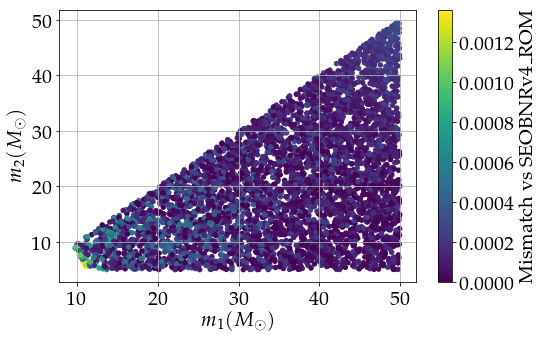

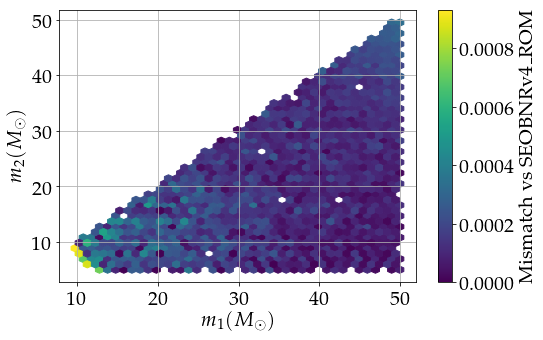

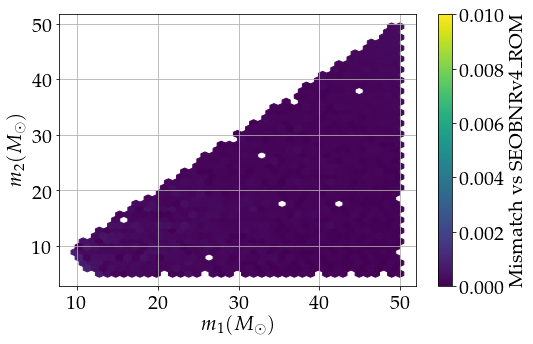

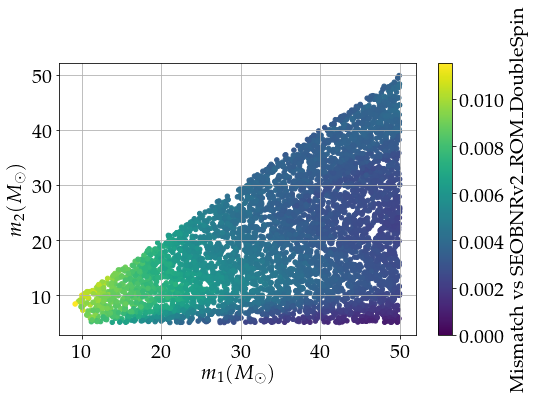

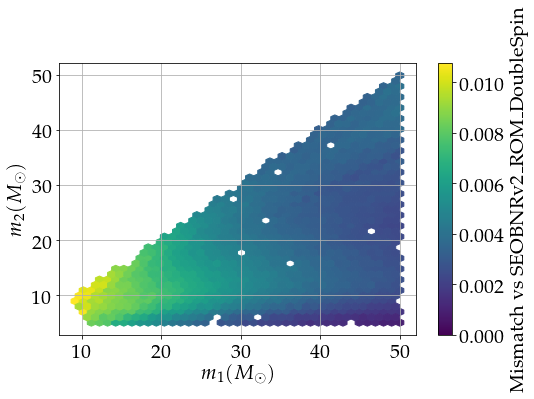

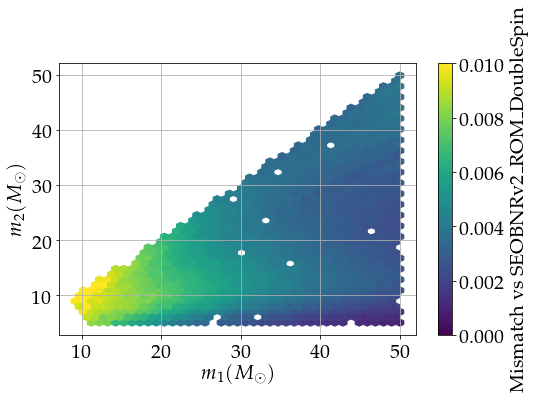

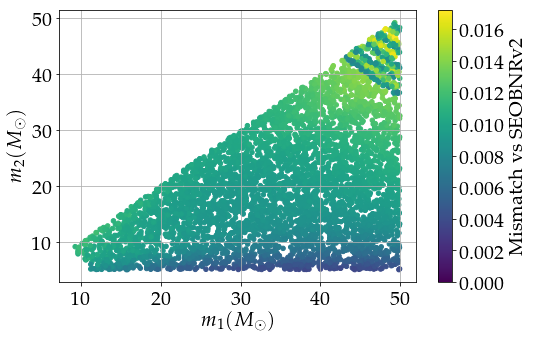

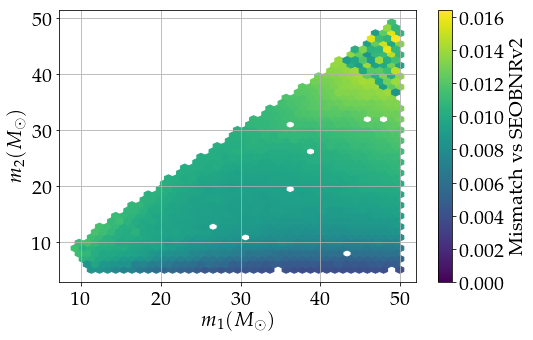

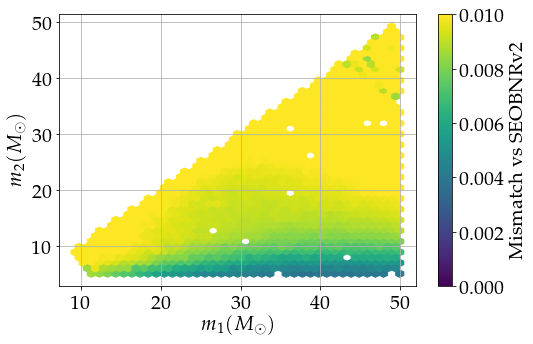

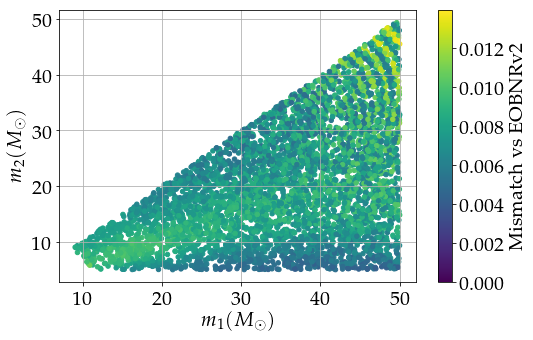

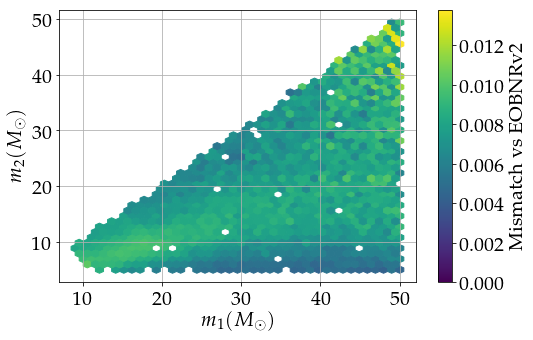

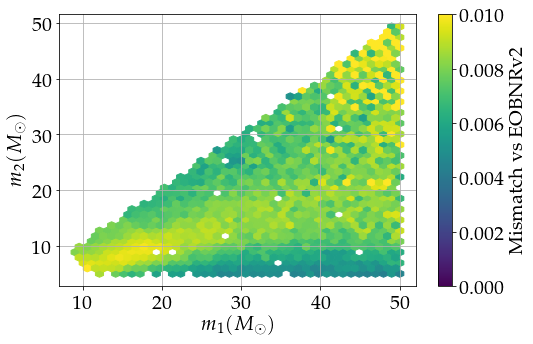

In [23]:
for d, a in zip(run_dirs, models):
    logging.warn("Showing figures for {0}".format(a))
    masked_results = all_masked_results[a]
    # figure style 1
    plt.figure(figsize = (8, 5))
    plt.scatter(masked_results['mass1'], masked_results['mass2'], c = 1. - masked_results['match'],
                 s = 20, vmin =  0)#, vmin = 0.96)
    plt.xlabel('$m_1 (M_\odot)$', fontsize = 20)
    plt.ylabel('$m_2 (M_\odot)$', fontsize = 20)
    plt.grid()
    cb = plt.colorbar()#(label='Overlap')
    cb.set_label('Mismatch vs {}'.format(a.replace('_', '\_')))
    plt.savefig(os.path.join(plot_dir,
                             '{0}_SEOBNRv4_no_incl_no_ecc_mismatch_over_mass1_mass2_scatter.pdf'.format(a)))
    
    # figure style 2
    plt.figure(figsize = (8, 5))
    plt.hexbin(masked_results['mass1'], masked_results['mass2'], C = 1. - masked_results['match'],
               gridsize = 40, vmin =  0)
    plt.xlabel('$m_1 (M_\odot)$', fontsize = 20)
    plt.ylabel('$m_2 (M_\odot)$', fontsize = 20)
    plt.grid()
    cb = plt.colorbar()#(label='Overlap')
    cb.set_label('Mismatch vs {}'.format(a.replace('_', '\_')))
    plt.savefig(os.path.join(plot_dir,
                             '{0}_SEOBNRv4_no_incl_no_ecc_mismatch_over_mass1_mass2_hex.pdf'.format(a)))
    
    # figure style 3
    plt.figure(figsize = (8, 5))
    plt.hexbin(masked_results['mass1'], masked_results['mass2'], C = 1. - masked_results['match'],
               gridsize = 40, vmax =  0.01, vmin = 0.)
    plt.xlabel('$m_1 (M_\odot)$', fontsize = 20)
    plt.ylabel('$m_2 (M_\odot)$', fontsize = 20)
    plt.grid()
    cb = plt.colorbar()#(label='Overlap')
    cb.set_label('Mismatch vs {}'.format(a.replace('_', '\_')))
    #plt.savefig(os.path.join(plot_dir, 'SEOBNRv4_ENIGMA_no_incl_no_ecc_match_over_mass1_mass2_hex.pdf'))

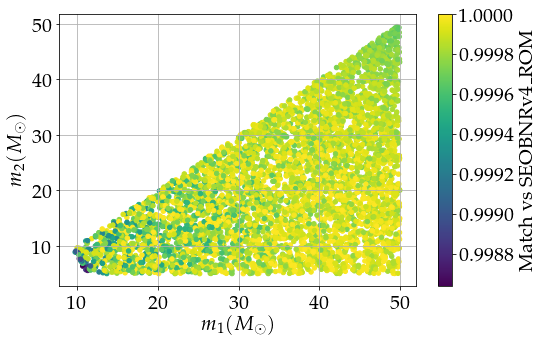

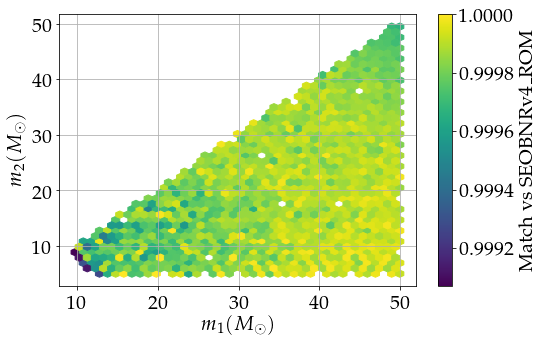

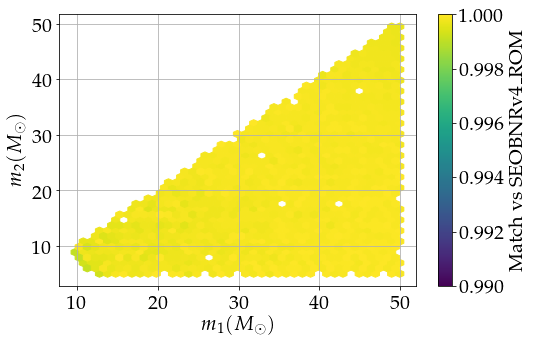

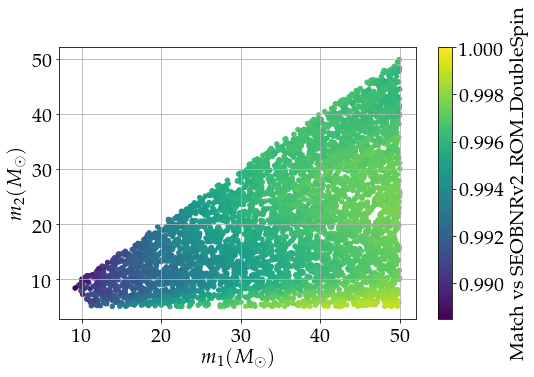

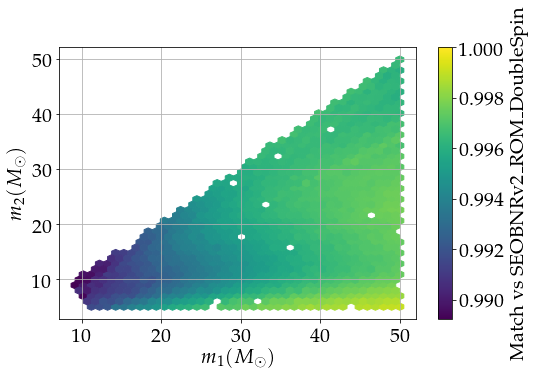

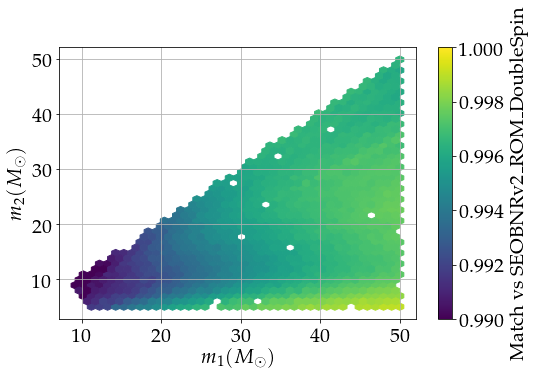

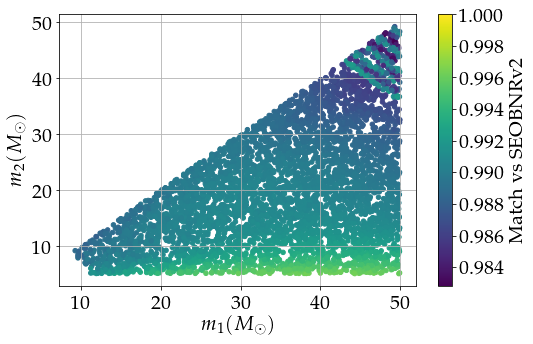

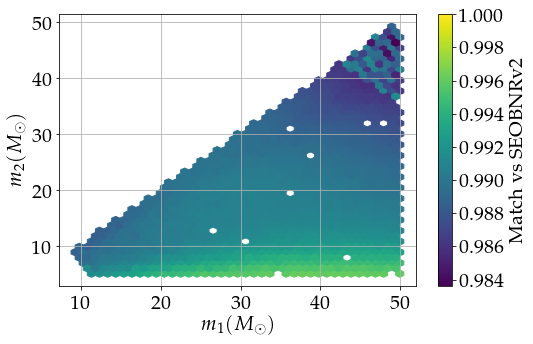

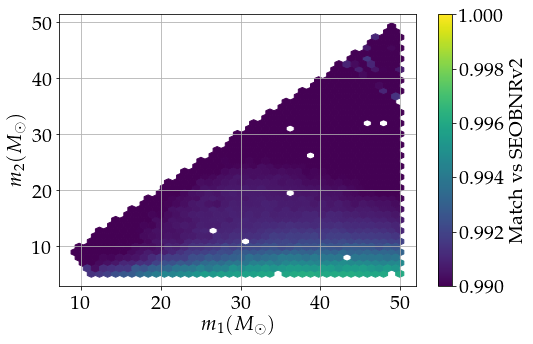

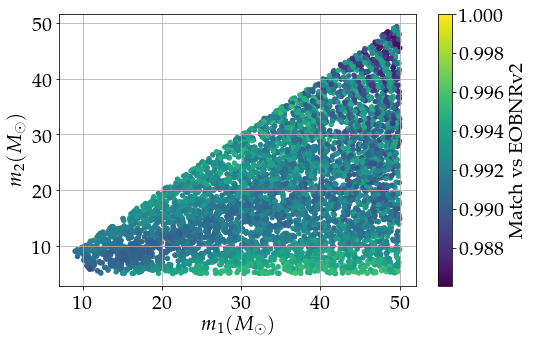

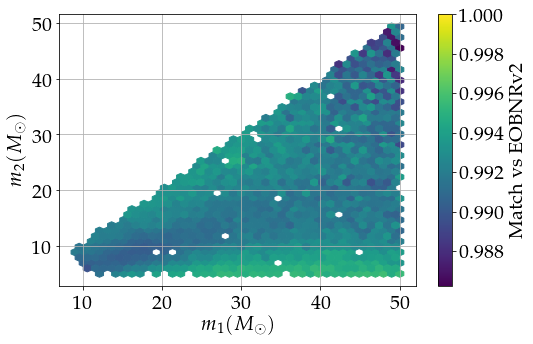

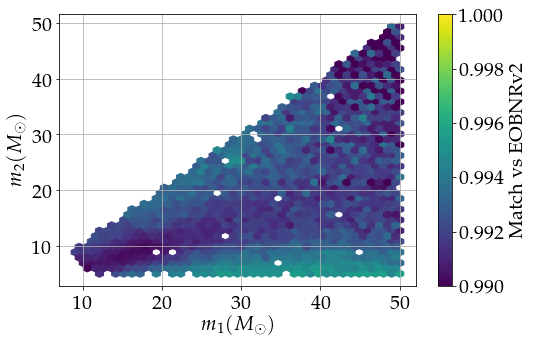

In [24]:
for d, a in zip(run_dirs, models):
    logging.warn("Showing figures for {0}".format(a))
    masked_results = all_masked_results[a]
    # figure style 1
    plt.figure(figsize = (8, 5))
    plt.scatter(masked_results['mass1'], masked_results['mass2'], c = masked_results['match'],
                 s = 20, vmax =  1)#, vmin = 0.96)
    plt.xlabel('$m_1 (M_\odot)$', fontsize = 20)
    plt.ylabel('$m_2 (M_\odot)$', fontsize = 20)
    plt.grid()
    cb = plt.colorbar()#(label='Overlap')
    cb.set_label('Match vs {}'.format(a.replace('_', '\_')))
    plt.savefig(os.path.join(plot_dir,
                             '{0}_SEOBNRv4_no_incl_no_ecc_match_over_mass1_mass2_scatter.pdf'.format(a)))
    
    # figure style 2
    plt.figure(figsize = (8, 5))
    plt.hexbin(masked_results['mass1'], masked_results['mass2'], C = masked_results['match'],
               gridsize = 40, vmax =  1)
    plt.xlabel('$m_1 (M_\odot)$', fontsize = 20)
    plt.ylabel('$m_2 (M_\odot)$', fontsize = 20)
    plt.grid()
    cb = plt.colorbar()#(label='Overlap')
    cb.set_label('Match vs {}'.format(a.replace('_', '\_')))
    plt.savefig(os.path.join(plot_dir,
                             '{0}_SEOBNRv4_no_incl_no_ecc_match_over_mass1_mass2_hex.pdf'.format(a)))
    
    # figure style 3
    plt.figure(figsize = (8, 5))
    plt.hexbin(masked_results['mass1'], masked_results['mass2'], C = masked_results['match'],
               gridsize = 40, vmax =  1, vmin = 0.99)
    plt.xlabel('$m_1 (M_\odot)$', fontsize = 20)
    plt.ylabel('$m_2 (M_\odot)$', fontsize = 20)
    plt.grid()
    cb = plt.colorbar()#(label='Overlap')
    cb.set_label('Match vs {}'.format(a.replace('_', '\_')))
    #plt.savefig(os.path.join(plot_dir, 'SEOBNRv4_ENIGMA_no_incl_no_ecc_match_over_mass1_mass2_hex.pdf'))